*October, 22nd, 2024*

### **IMPORTANT NOTE:** If you are accessing this notebook directly in Colab, do not forget to create a copy and work in your own file. You can do this by selecting:

### **FILE -> Save a copy in Drive**

### This will save a copy in your own Drive space.

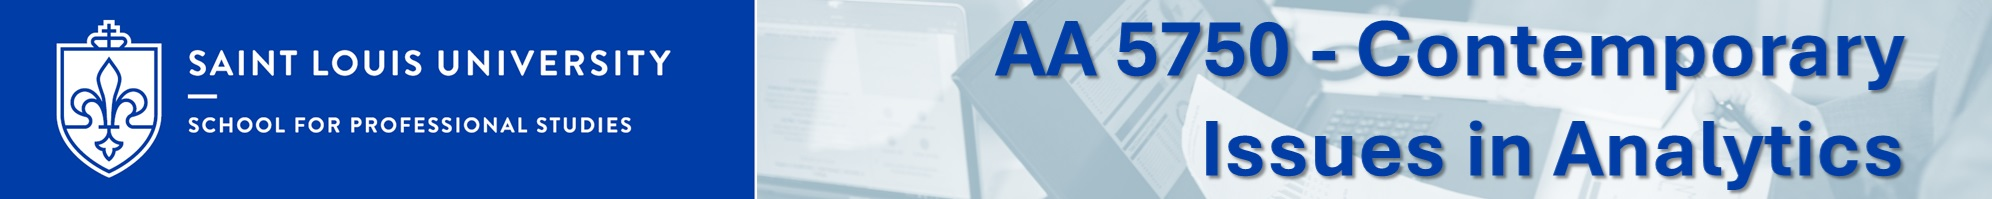

# **Week 1. Feed Forward Artificial Neural Networks.**

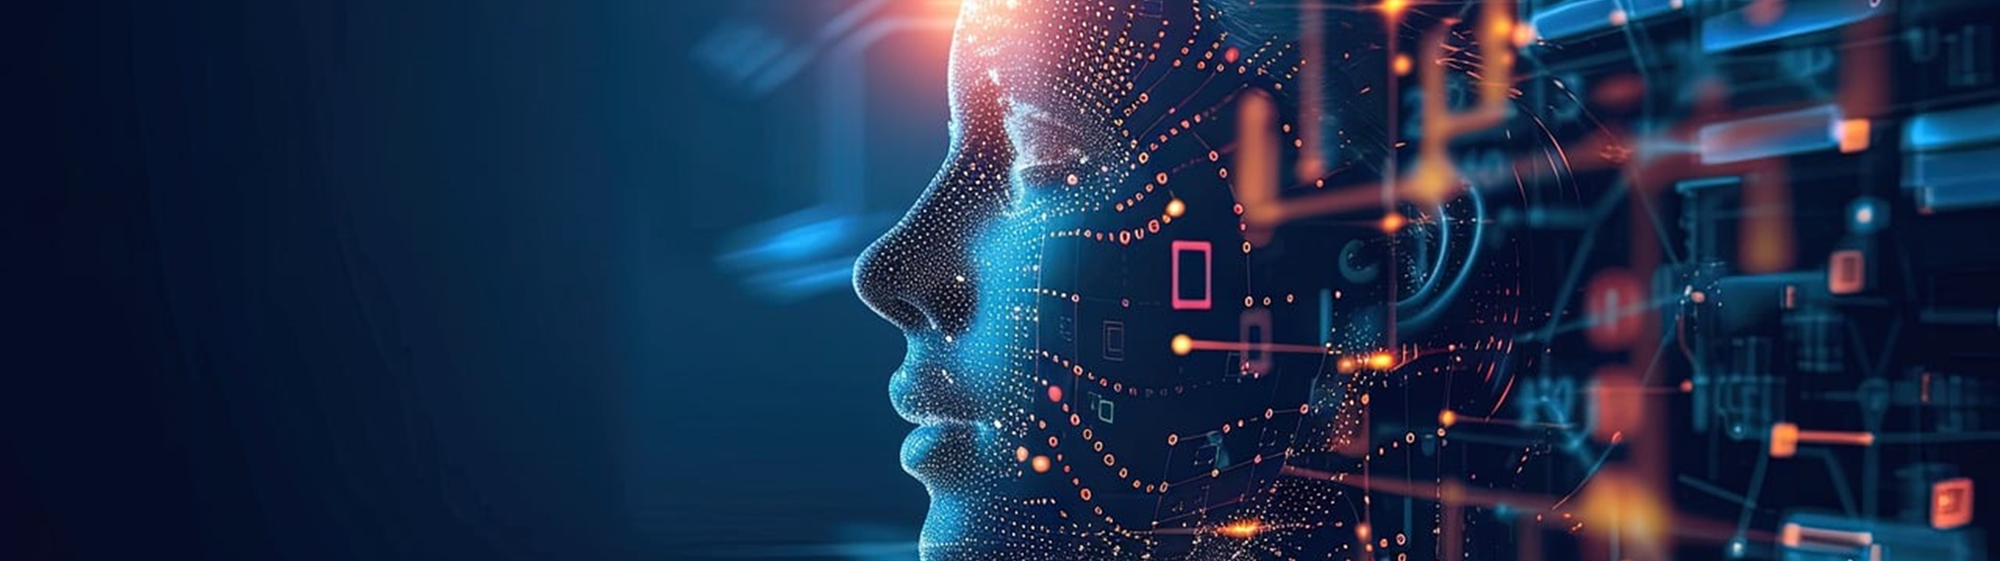

# **GOAL:** To become acquainted with the Feedforward Artificial Neural Network algorithm, including its building blocks, architecture, training, and optimization, exemplified through a classification problem.


--------------------
## **Context**
--------------------

The world is rapidly evolving and continuously seeks the best knowledge and expertise from individuals. This drives people worldwide to excel in their careers and pursue advanced degrees that can help them enhance their skills and knowledge. As a result, the number of students applying for master's programs has increased significantly.

The current admissions dataset was created for the purpose of predicting admissions to the University of California, Los Angeles (UCLA). It was designed to assist students in selecting universities based on their profiles. The predicted outcome provides them with a fair indication of their chances of being accepted.

----------------------
## **Objective**
----------------------

We need to build a classification model using neural networks to predict a student's chances of admission to UCLA.

------------------------------
## **Data dictionary**
------------------------------

The dataset contains several features that are considered important when applying for master's programs. The included features are:

* GRE Scores: (up to 340)
* TOEFL Scores: (up to 120)
* University Rating: Indicates graduation ranking (1 to 5)
* Statement of Purpose Strength: (1 to 5)
* Letter of Recommendation Strength: (1 to 5)
* GPA: (1 to 10)
* Research Experience: (0 or 1)
* Admission Probability: (from 0 to 1)


## **Loading the libraries and the dataset**

First, we will import the data so that Colab can access the dataset **(Admission_Predict.csv)**. One way to load the data in Colab is by uploading the dataset directly into the notebook. The following code does exactly that. Once you run the cell, it will prompt you to select the file from your local system.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.layers import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [89]:
from google.colab import files
# File to import: Admission_Predict.csv
uploaded = files.upload()

Saving Admission_Predict.csv to Admission_Predict (3).csv


In [90]:
# Importing the dataset
data = pd.read_csv('/content/Admission_Predict.csv')

# Check the top five records of the data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Observations:**

* In the previous dataset, the target variable is Chance of Admit.
* To make this a classification task, we will convert the target variable into a categorical variable using an 80% threshold.
* We are assuming that if Chance of Admit is more than 80%, then Admit would be 1 (i.e., yes), otherwise, it would be 0 (i.e., no).

In [91]:
# Converting the target variable into a categorical variable

data['Admit'] = data['Chance of Admit '].apply(lambda x: 1 if x > 0.8 else 0)


Now that we have created a new target variable, we can remove the ***Chance of Admit*** column from the dataset. We can also remove the ***Serial No.*** column as it would not add any value to our analysis.

In [92]:
# Dropping columns
data = data.drop(['Serial No.', 'Chance of Admit '], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


## **Data Preparation**

This dataset contains both numerical and categorical variables. We need to process them first before passing them to the neural network. We will perform the following preprocessing steps:

One-hot encoding of categorical variables. Scaling of numerical variables.

One important point to remember: Before scaling the numerical variables, we will first split the dataset into training and test sets and perform the scaling separately. Otherwise, we would be leaking information from the test set into the training set, which could lead to the model giving a false sense of good performance. This is known as data leakage, which we want to avoid.



In [93]:
features = data.drop(['Admit'], axis=1)

target = data['Admit']

Now, let’s split the dataset into training and test sets. To do this, we will extract all the independent variables and store them in a variable called **features**. The target variable **Admit** will be stored in a variable called **target**. These two variables will be used to divide the main dataset into training and test sets.

In [94]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

Scaling of numerical variables.

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# **Building the Neural Network models**

### **1. Architecture and weights and biases.**

In [96]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [97]:
# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

We will develop an architecture of two hidden layers, the first one with 16 neurons and the second with 32. We will use ReLu as the activation function.

In [98]:
model_1 = Sequential()
model_1.add(Dense(16, activation='relu', input_shape=(7,)))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
model_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

When "compiling" the model, we refer to the process of configuring the model for training by specifying key elements like the optimizer, loss function, and evaluation metrics. It prepares the model to learn from data during the training process.

As we ask for the "Summary" of the model, we realize that this concrete architecture will estimate 705 parameters. We can detail this number as follows:


1. ***First Dense Layer (dense_16)***
Input shape: (7,)

*Number of neurons: 16*

**Parameters:** Each neuron in this layer is connected to all 7 input features. So, each of the 16 neurons has 7 weights. In addition, each neuron has 1 bias term.

**Calculation:**

Number of parameters =(7 weights + 1 bias) x 16 neurons = 8 × 16 = **128**


2. ***Second Dense Layer (dense_17)***
Input shape: (16,) (from the output of the previous layer)

*Number of neurons: 32*

**Parameters:** Each of the 32 neurons in this layer is connected to the 16 outputs from the previous layer. Each neuron also has 1 bias term.

**Calculation:**

Number of parameters = ( 16 weights + 1 bias) × 32 neurons = 17 × 32 = **544**

3. ***Third Dense Layer (dense_18)***
Input shape: (32,) (from the output of the previous layer)

Number of neurons: 1 (as this is the output layer with a single neuron for binary classification)

**Parameters:** The single output neuron is connected to the 32 outputs from the previous layer. This neuron also has 1 bias term.

**Calculation:**

Number of parameters=(32 weights+1 bias)×1 neuron=33
Therefore, the number of parameters in this layer is 33.



Now we will train this model using 100 epochs.

In [100]:
# Before training, we will deploy some lines of code to measure the training time required by this architecture.

import time
start_time = time.time()

history_1 = model_1.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/100
12/12 - 2s - 148ms/step - accuracy: 0.7278 - loss: 0.6722 - val_accuracy: 0.5750 - val_loss: 0.7330
Epoch 2/100
12/12 - 0s - 28ms/step - accuracy: 0.7278 - loss: 0.6567 - val_accuracy: 0.5750 - val_loss: 0.7270
Epoch 3/100
12/12 - 0s - 11ms/step - accuracy: 0.7278 - loss: 0.6429 - val_accuracy: 0.5750 - val_loss: 0.7221
Epoch 4/100
12/12 - 0s - 25ms/step - accuracy: 0.7278 - loss: 0.6306 - val_accuracy: 0.5750 - val_loss: 0.7175
Epoch 5/100
12/12 - 0s - 11ms/step - accuracy: 0.7278 - loss: 0.6196 - val_accuracy: 0.5750 - val_loss: 0.7096
Epoch 6/100
12/12 - 0s - 12ms/step - accuracy: 0.7278 - loss: 0.6074 - val_accuracy: 0.5750 - val_loss: 0.6970
Epoch 7/100
12/12 - 0s - 24ms/step - accuracy: 0.7278 - loss: 0.5921 - val_accuracy: 0.5750 - val_loss: 0.6801
Epoch 8/100
12/12 - 0s - 23ms/step - accuracy: 0.7278 - loss: 0.5713 - val_accuracy: 0.5750 - val_loss: 0.6585
Epoch 9/100
12/12 - 0s - 11ms/step - accuracy: 0.7278 - loss: 0.5471 - val_accuracy: 0.5750 - val_loss: 0.6357


As we have trained our model for 100 epochs or 'trials,' we can see the accuracy reached at the end of the training. We can compare this training accuracy with the corresponding validation set accuracy (val_accuracy) to verify overfitting once the training process finishes.

The process took ~ 13 seconds.

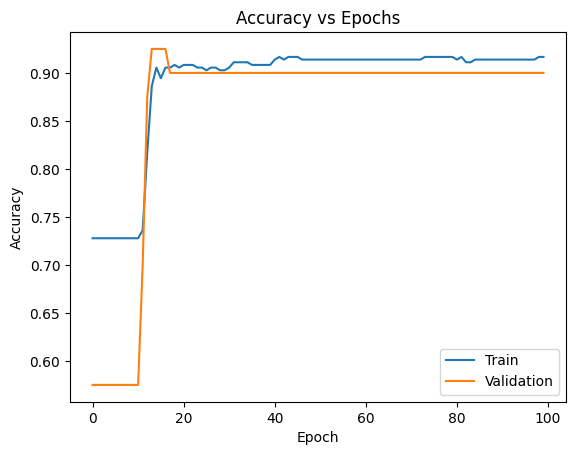

In [101]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

How can we see a graphical representation of this neural network (Model_1)? Let's see:

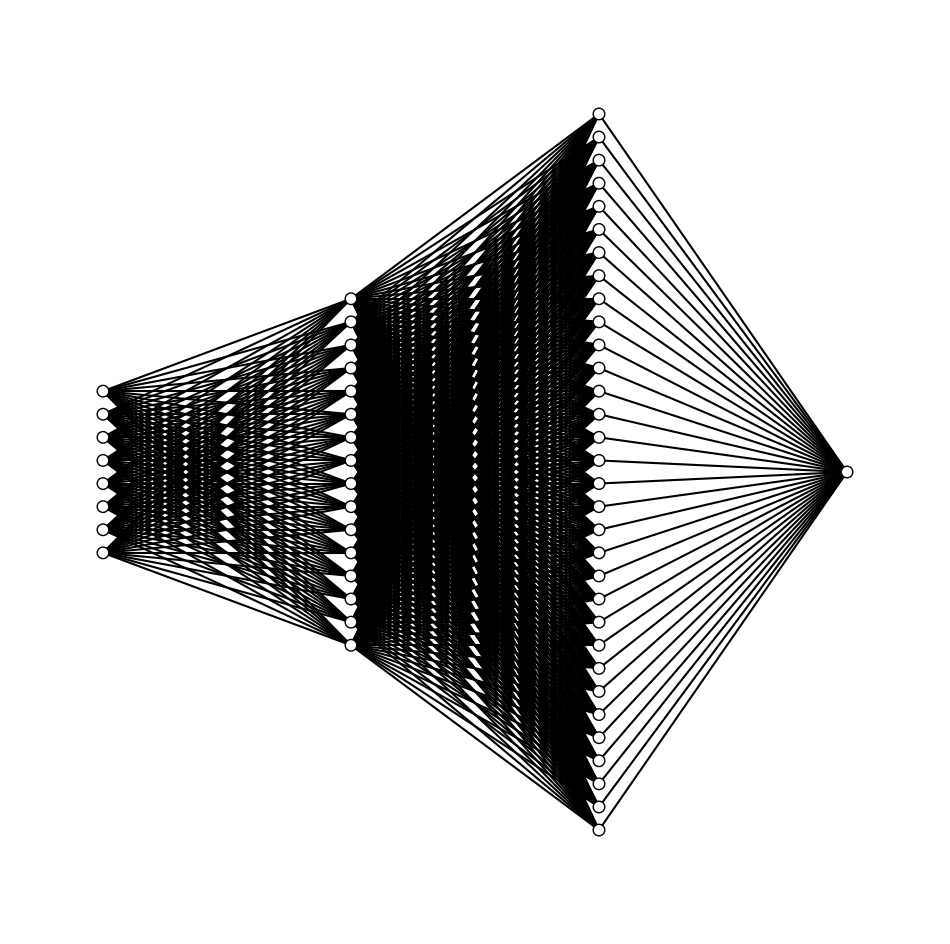

In [103]:
# This code snipplet runs a personalized function that will "draw" the architecture
# developed.

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if n > 0:
                prev_layer_top = v_spacing * (layer_sizes[n - 1] - 1) / 2. + (top + bottom) / 2.
                for k in range(layer_sizes[n - 1]):
                    line = plt.Line2D([n * h_spacing + left - h_spacing, n * h_spacing + left],
                                      [prev_layer_top - k * v_spacing, layer_top - m * v_spacing], c='k')
                    ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

# Define the structure of your model
layer_sizes = [8, 16, 32, 1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()



What about the weights and biases calculated for the mmodel (model_1)? Let's see.

In [104]:
for layer in model_1.layers:
    weights, biases = layer.get_weights()
    print(f"Layer: {layer.name}")
    print(f"Weights: {weights.shape}\n{weights}")
    print(f"Biases: {biases.shape}\n{biases}")
    print("-" * 40)

Layer: dense
Weights: (7, 16)
[[ 0.438754    0.39594916 -0.14432806  0.54697543 -0.49992806  0.09248451
   0.60210323 -0.46300057 -0.0591997   0.10590887 -0.42247698  0.01100253
   0.63457954 -0.03168673 -0.02779396  0.56071794]
 [-0.44243374 -0.02247966  0.01454788 -0.3854809  -0.5561786   0.19560453
   0.6195705  -0.40614492  0.28442147 -0.47813606 -0.03852576  0.09410077
   0.28283244 -0.36330774 -0.37706915  0.863887  ]
 [-0.16890967  0.1083182  -0.23996389 -0.12978402  0.13717681 -0.40752676
   0.2588803   0.08886566 -0.43814924  0.02718057 -0.16944599  0.00648213
   0.5026909  -0.09881753  0.13201812 -0.03842207]
 [-0.12893078  0.33527294  0.11891752  0.13117103 -0.57440305 -0.36597383
   0.34467754  0.30260798 -0.11486448 -0.11687805 -0.4769845  -0.3233807
   0.35141093  0.4080787  -0.09657097  0.42143077]
 [-0.02071899  0.45082465 -0.18869078  0.00277434  0.26477823  0.31661046
   0.2983598   0.3011518   0.27067325 -0.22826672  0.13838518 -0.31198487
   0.61259186  0.2569947   

Let's calculate the accuracy for the test set and also construct a confusion matrix and a classification report.

In [105]:
model_1.evaluate(X_test_normalized, y_test, verbose = 1)
model_1_test_pred = np.round(model_1.predict(X_test_normalized))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.1226 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Results for model_1 TEST
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.93      0.93      0.93        27

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100



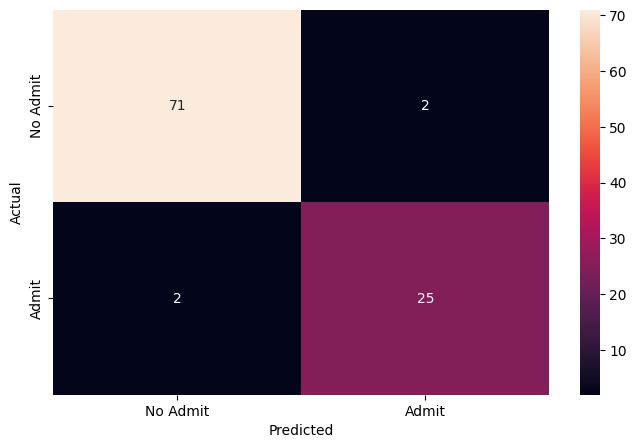

In [106]:
print('======================================================================================================================')
print('Results for model_1 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_1_test_pred))
cm = confusion_matrix(y_test, model_1_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **2. Activation Functions**


Activation functions are core to the optimization process in neural networks. They introduce non-linearity to the results of each neuron in the hidden layers and the output layer, if required. The choice of specific types depends on the goal and characteristics of the problem at hand.

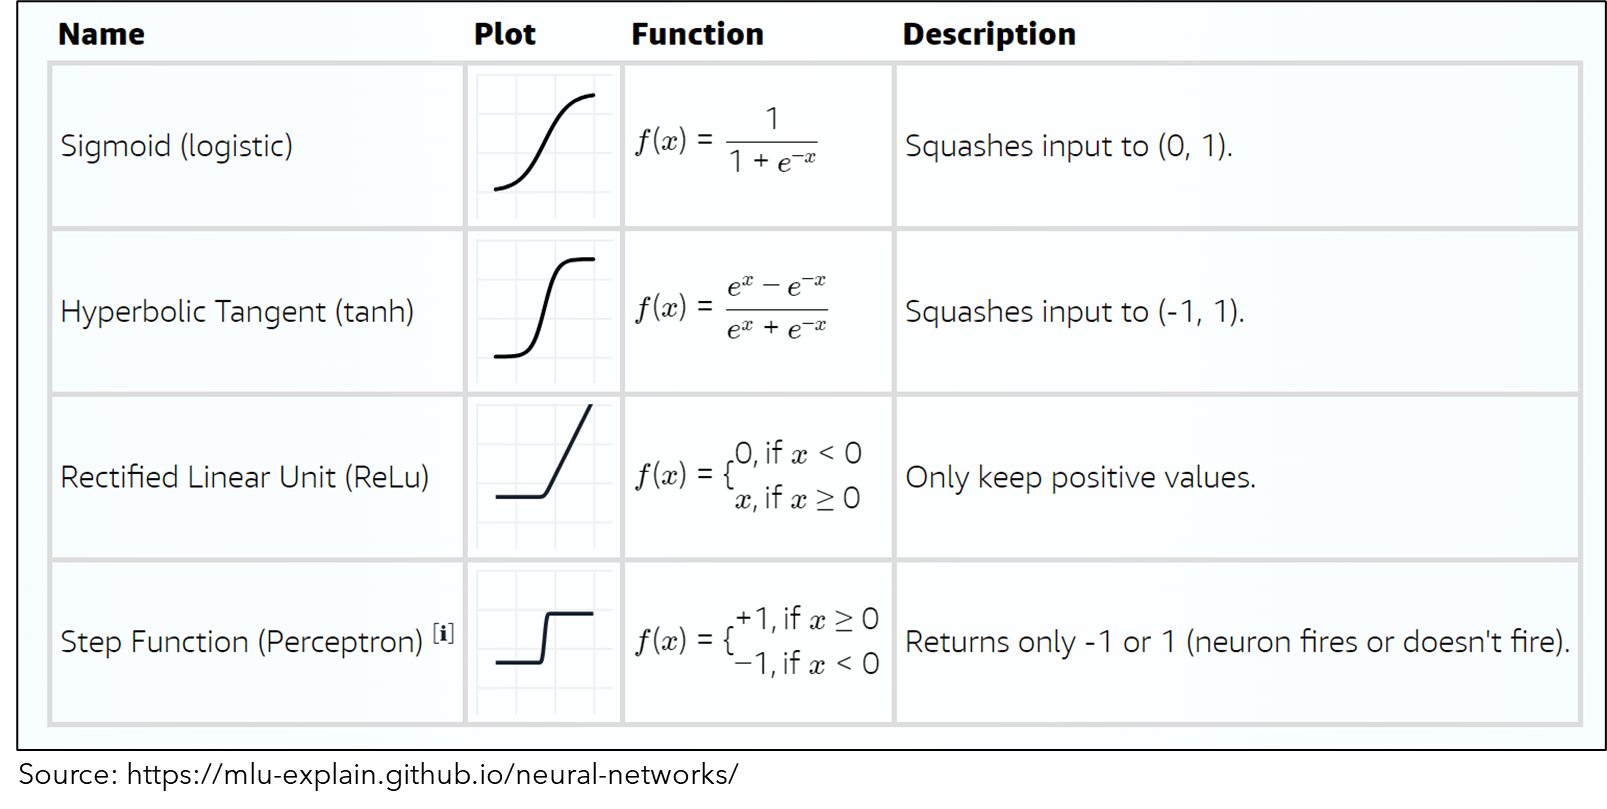

Let's try  a different activation function (Tanh) on our already training mode. Do not forget to clear the back end andset the random seeds.

In [107]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


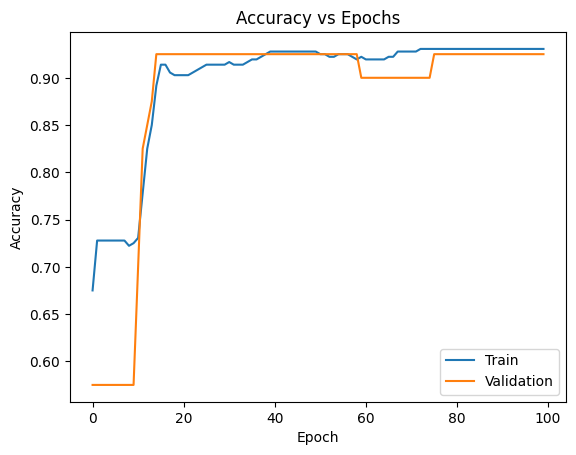

In [108]:
model_2 = Sequential()
model_2.add(Dense(16, activation='tanh', input_shape=(7,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history_2 = model_2.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=0)                                                  # Here we will avoid showing detail of the training process (Verbose = 0)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9569 - loss: 0.1132 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Results for model_2 TEST
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        73
           1       0.87      1.00      0.93        27

    accuracy                           0.96       100
   macro avg       0.94      0.97      0.95       100
weighted avg       0.97      0.96      0.96       100



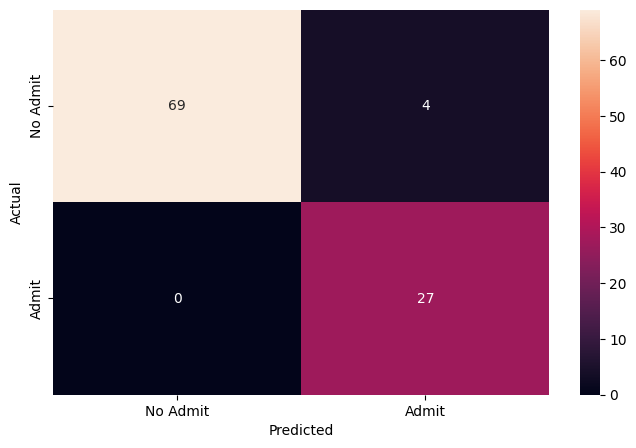

In [109]:
# Let's see now the predictions for y_test and construct the corresponding Confussion Matrix and the Classification Report.
model_2.evaluate(X_test_normalized, y_test, verbose = 1)
model_2_test_pred = np.round(model_2.predict(X_test_normalized))
print('======================================================================================================================')
print('Results for model_2 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_2_test_pred))
cm = confusion_matrix(y_test, model_2_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We got similar results on Test, but slightly better ones for Precision, Recall and F1-Score for the class 1 using Tanh as the activation function.

### **3. Backward-Forward propagation & Gradient Descent**

Let's now see how changes in the optimizer of gradient descent and changes in the learning rate can modify the current results of our already trained model.  

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train the model_3: 13.31 seconds


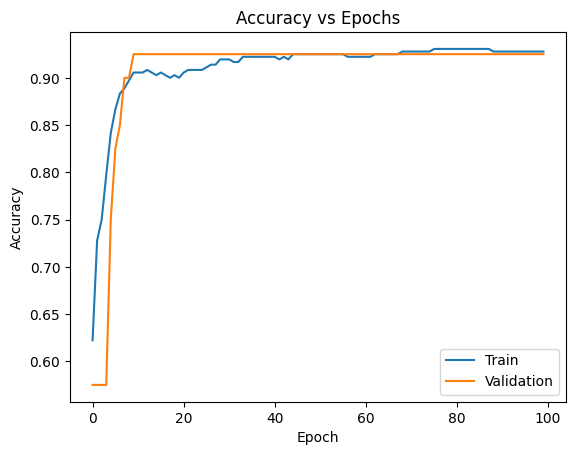

In [110]:
# We will construct a new model, model_3, using the same architecture of the previous one.
# Now we will change the gradient descent method to SGD and use a learing rate of 0.1
# We will calculate the time of training.
# We will keep the loss function and Accuracy as the performance metric
model_3 = Sequential()
model_3.add(Dense(16, activation='tanh', input_shape=(7,)))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=['accuracy'])
start_time = time.time()
history_3 = model_3.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=0)                                                   # Here we will avoid showing detail of the training process
end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the model_3: {training_time:.2f} seconds")
print ('======================================================================================================================')
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9415 - loss: 0.1217 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Results for model_3 TEST
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       0.96      0.85      0.90        27

    accuracy                           0.95       100
   macro avg       0.95      0.92      0.93       100
weighted avg       0.95      0.95      0.95       100



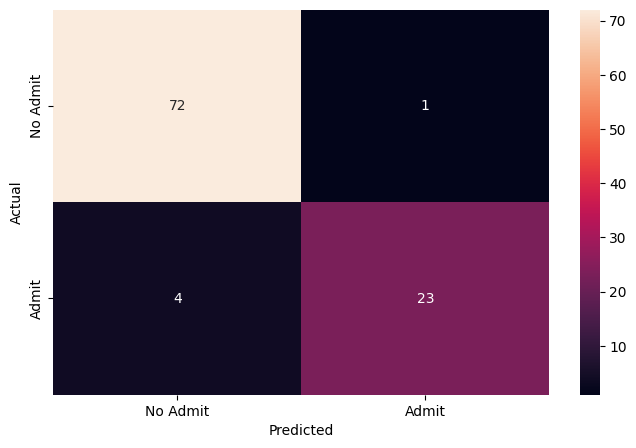

In [111]:
# Let's see now the predictions for y_test and construct the corresponding Confussion Matrix and the Classification Report.
model_3.evaluate(X_test_normalized, y_test, verbose = 1)
model_3_test_pred = np.round(model_3.predict(X_test_normalized))
print('======================================================================================================================')
print('Results for model_3 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_3_test_pred))
cm = confusion_matrix(y_test, model_3_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We can conclude that using SGD with a learning rate of 0.1 reduced the training time (~15 seconds) but resulted in a lower recall (85%).

### **4. Weights initialization**

What will happen to a model if we optimally initialize weights? Let's see the results on the training process and results.

In [112]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train the model_4_glorot: 12.82 seconds


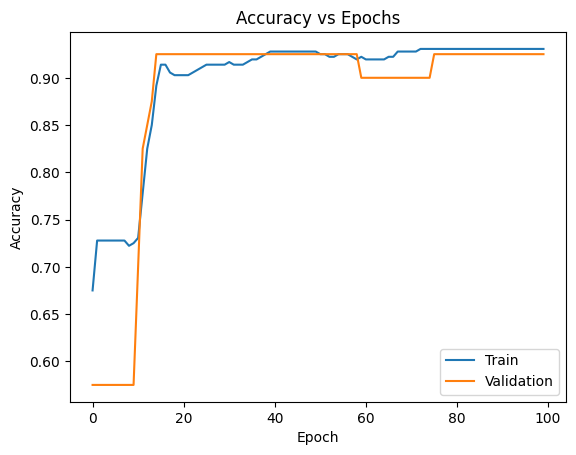

In [113]:
# We will use the best model so far (model_2) to construct a new one (model_4) optimizing the initial values of weights
# we will use the Xavier's and He's  algorithms.
# Also, we will save the time requirements

#  WE WILL START WITH THE GLOROT ALGORITHM
from tensorflow.keras.initializers import GlorotUniform, HeNormal
model_4_glorot = Sequential()
model_4_glorot.add(Dense(16, activation='tanh', input_shape=(7,), kernel_initializer=GlorotUniform()))         #See here how we implemented the Glorot initialization
model_4_glorot.add(Dense(32, activation='tanh'))
model_4_glorot.add(Dense(1, activation='sigmoid'))
model_4_glorot.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
start_time = time.time()
history_4_glorot = model_4_glorot.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=0)                                                  # See here how we implemented Glorot initialization.
end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the model_4_glorot: {training_time:.2f} seconds")
print ('======================================================================================================================')
plt.plot(history_4_glorot.history['accuracy'])
plt.plot(history_4_glorot.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9569 - loss: 0.1132 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Results for model_4_glorot TEST
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        73
           1       0.87      1.00      0.93        27

    accuracy                           0.96       100
   macro avg       0.94      0.97      0.95       100
weighted avg       0.97      0.96      0.96       100



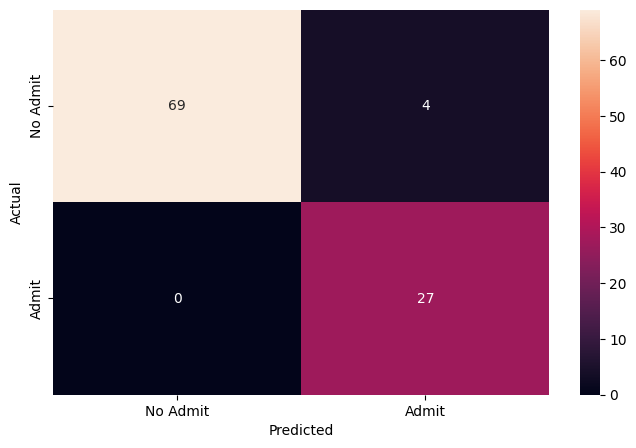

In [114]:
# Let's see now the predictions for y_test and construct the corresponding Confussion Matrix and the Classification Report.
model_4_glorot.evaluate(X_test_normalized, y_test, verbose = 1)
model_4_glorot_test_pred = np.round(model_4_glorot.predict(X_test_normalized))
print('======================================================================================================================')
print('Results for model_4_glorot TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_4_glorot_test_pred))
cm = confusion_matrix(y_test, model_4_glorot_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Implementing the Glorot algorithm required more time, but Accuracy, Precicion and Recall improved.

Let's see results for the He's algorithm:

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train the model_4_He: 13.17 seconds


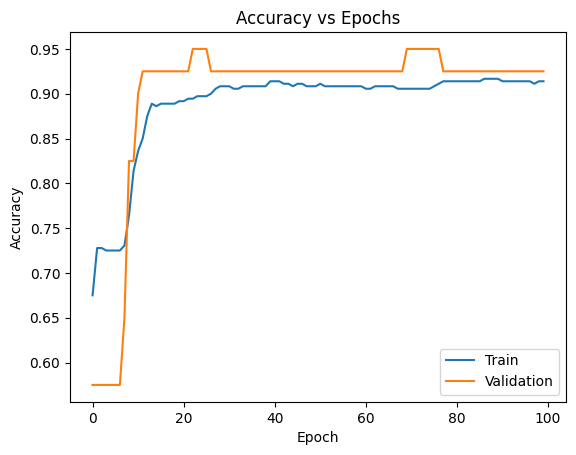

In [115]:
#  WE WILL START WITH THE HE (Uniform) ALGORITHM
from tensorflow.keras.initializers import GlorotUniform, HeNormal
model_4_He = Sequential()
model_4_He.add(Dense(16, activation='tanh', input_shape=(7,), kernel_initializer=HeNormal()))         #See here how we implemented the HeNormal initialization
model_4_He.add(Dense(32, activation='tanh'))
model_4_He.add(Dense(1, activation='sigmoid'))
model_4_He.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
start_time = time.time()
history_4_He = model_4_He.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=0)                                                  # See here how we implemented Glorot initialization.
end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the model_4_He: {training_time:.2f} seconds")
print ('======================================================================================================================')
plt.plot(history_4_He.history['accuracy'])
plt.plot(history_4_He.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9630 - loss: 0.1259 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Results for model_4_He TEST
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.93      0.96      0.95        27

    accuracy                           0.97       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.97      0.97      0.97       100



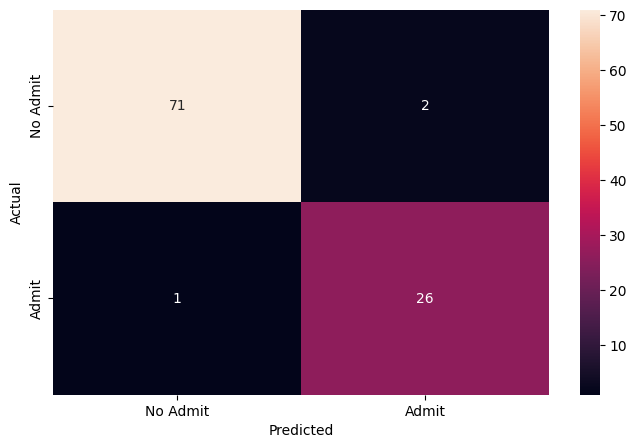

In [116]:
# Let's see now the predictions for y_test and construct the corresponding Confussion Matrix and the Classification Report.
model_4_He.evaluate(X_test_normalized, y_test, verbose = 1)
model_4_He_test_pred = np.round(model_4_He.predict(X_test_normalized))
print('======================================================================================================================')
print('Results for model_4_He TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_4_He_test_pred))
cm = confusion_matrix(y_test, model_4_He_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

As can be seen, the He algorithm changes training time but resulted in different accuracy for the trained model. It seems that HeNormal helped in achieving a better model.

### **5. Training the model and optimizing it.**

We will exemplify the use of early stopping and Bayesian search to obtain the optimal hyperparameters for our model, using the best one so far (model_4_glorot) and creating a new version: model_5.

In [117]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 - 2s - 128ms/step - accuracy: 0.6750 - loss: 0.6595 - val_accuracy: 0.5750 - val_loss: 0.7212
Epoch 2/200
12/12 - 0s - 8ms/step - accuracy: 0.7278 - loss: 0.6272 - val_accuracy: 0.5750 - val_loss: 0.7408
Epoch 3/200
12/12 - 0s - 11ms/step - accuracy: 0.7278 - loss: 0.6096 - val_accuracy: 0.5750 - val_loss: 0.7196
Epoch 4/200
12/12 - 0s - 12ms/step - accuracy: 0.7278 - loss: 0.5906 - val_accuracy: 0.5750 - val_loss: 0.6914
Epoch 5/200
12/12 - 0s - 7ms/step - accuracy: 0.7278 - loss: 0.5728 - val_accuracy: 0.5750 - val_loss: 0.6708
Epoch 6/200
12/12 - 0s - 11ms/step - accuracy: 0.7278 - loss: 0.5557 - val_accuracy: 0.5750 - val_loss: 0.6538
Epoch 7/200
12/12 - 0s - 7ms/step - accuracy: 0.7278 - loss: 0.5386 - val_accuracy: 0.5750 - val_loss: 0.6347
Epoch 8/200
12/12 - 0s - 7ms/step - accuracy: 0.7278 - loss: 0.5213 - val_accuracy: 0.5750 - val_loss: 0.6136
Epoch 9/200
12/12 - 0s - 7ms/step - accuracy: 0.7222 - loss: 0.5037 - val_accuracy: 0.5750 - val_loss: 0.5924
Epoch 10/200
12/1

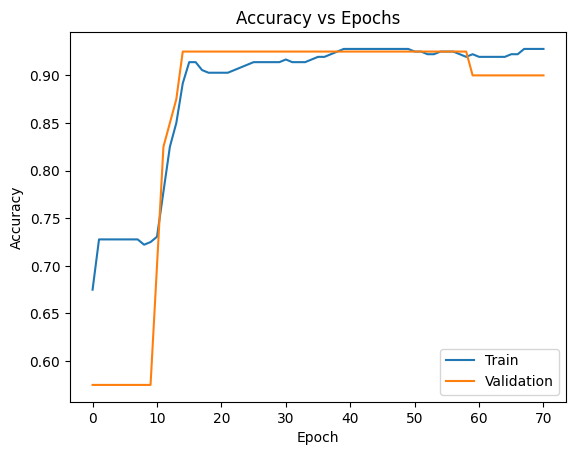

In [118]:
# We will raise the number of epochs to 200 epochs and keep 32 as the size of batch size
# We will also implement EarlyStopping to stopt the training at an optimal level

from tensorflow.keras.initializers import GlorotUniform, HeNormal
from tensorflow.keras.callbacks import EarlyStopping


# Specifying the EarlyStopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=15, min_delta=0.00000000000000001, restore_best_weights=True)
"""
Early stopping monitors Accuracy as the main criteria.
The patience parameter controls how many epochs the training process will wait
after the last improvement in the monitored metric before stopping.
If the Loss function does not improve for the specified number of epochs (in this case, 15), training stops.
The min_delta parameter specifies the minimum change in the monitored metric to qualify as an improvement.
If the change in the metric is smaller than min_delta (in this case a truly low value), it will not be considered an improvement.
When restore_best_weights=True is set, the model will restore the weights from the epoch where the
monitored metric achieved its best value (e.g., lowest validation loss or highest accuracy) after stopping early.
This ensures that the model ends up with the best-performing weights, not the ones from the final epoch.
Also, we will increase the number opf epochs to 200.
"""

model_5 = Sequential()
model_5.add(Dense(16, activation='tanh', input_shape=(7,), kernel_initializer=GlorotUniform()))
model_5.add(Dense(32, activation='tanh'))
model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
start_time = time.time()
history_5 = model_5.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=200,
                    verbose=2,
                    callbacks=[early_stopping])
end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the model_5: {training_time:.2f} seconds")
print ('======================================================================================================================')
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.1303 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Results for model_5 TEST
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.93      1.00      0.96        27

    accuracy                           0.98       100
   macro avg       0.97      0.99      0.98       100
weighted avg       0.98      0.98      0.98       100



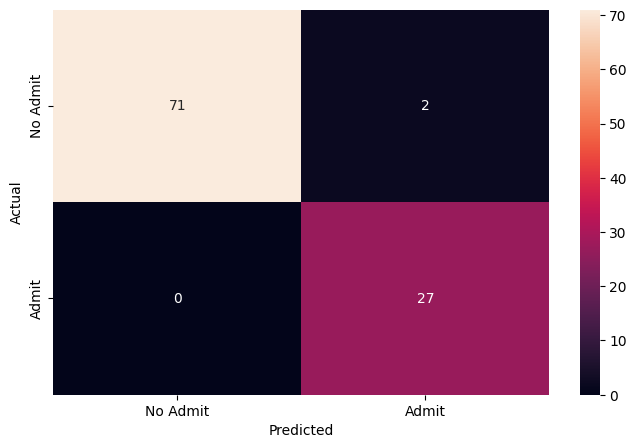

In [119]:
# Let's see now the predictions for y_test and construct the corresponding Confussion Matrix and the Classification Report.
model_5.evaluate(X_test_normalized, y_test, verbose = 1)
model_5_test_pred = np.round(model_5.predict(X_test_normalized))
print('======================================================================================================================')
print('Results for model_5 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_5_test_pred))
cm = confusion_matrix(y_test, model_5_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We achieved better accuracy, completing the training in 71 epochs (without needing to complete the original 100) and taking less time (10 seconds).

Finally, how can we deploy a Bayesian search to obtain the best combination of hyperparameters (number of neurons in the first and second hidden layers, and the best learning rate)?

In [127]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

In [121]:
!pip install keras-tuner                                                        # This library is necessary for Bayesian Optimization

In [136]:
import keras_tuner as kt

from tensorflow.keras.optimizers import Adam

# We create our space search, looking for the optimal number of neurons in the
# first and second hidden layers and the optimal learning rate.
# We crate a specific function called build_model

def build_model(hp):
    model = Sequential()

    # Tune the number of units in the first Dense layer
    units_1 = hp.Int('units_1', min_value=16, max_value=128, step=8)
    model.add(Dense(units_1, activation='tanh', input_shape=(7,)))

    # Tune the number of units in the second Dense layer
    units_2 = hp.Int('units_2', min_value=16, max_value=128, step=8)
    model.add(Dense(units_2, activation='tanh'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='LOG')
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [137]:
# Here we create an object for executing the optimization.

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',                                                   # Optimize for validation accuracy
    max_trials=5,                                                               # Number of trials to deploy
    executions_per_trial=2,                                                     # Try each combination 2 times for more stable results
    directory='my_dir',                                                         # Where to save tuning results
    project_name='bayesian_tuning_nn'
)


Reloading Tuner from my_dir/bayesian_tuning_nn/tuner0.json


In [138]:
# We then apply the definided optimizer to the train set.

tuner.search(X_train_normalized, y_train, validation_split=0.1, epochs=100, batch_size=32)


In [139]:
# We can print the optimal values found.

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of units in first Dense layer: {best_hps.get('units_1')}")
print(f"Best number of units in second Dense layer: {best_hps.get('units_2')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Best number of units in first Dense layer: 66
Best number of units in second Dense layer: 50
Best learning rate: 0.02708189655654633


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 - 2s - 129ms/step - accuracy: 0.6528 - loss: 0.7391 - val_accuracy: 0.5500 - val_loss: 0.6040
Epoch 2/200
12/12 - 0s - 10ms/step - accuracy: 0.7583 - loss: 0.4558 - val_accuracy: 0.5750 - val_loss: 0.7307
Epoch 3/200
12/12 - 0s - 8ms/step - accuracy: 0.7694 - loss: 0.3803 - val_accuracy: 0.6500 - val_loss: 0.5597
Epoch 4/200
12/12 - 0s - 10ms/step - accuracy: 0.8611 - loss: 0.2815 - val_accuracy: 0.9250 - val_loss: 0.3629
Epoch 5/200
12/12 - 0s - 6ms/step - accuracy: 0.8917 - loss: 0.2623 - val_accuracy: 0.9250 - val_loss: 0.3126
Epoch 6/200
12/12 - 0s - 13ms/step - accuracy: 0.9083 - loss: 0.2253 - val_accuracy: 0.9250 - val_loss: 0.3605
Epoch 7/200
12/12 - 0s - 10ms/step - accuracy: 0.9167 - loss: 0.2056 - val_accuracy: 0.9250 - val_loss: 0.3869
Epoch 8/200
12/12 - 0s - 6ms/step - accuracy: 0.9056 - loss: 0.2150 - val_accuracy: 0.9250 - val_loss: 0.3385
Epoch 9/200
12/12 - 0s - 12ms/step - accuracy: 0.9194 - loss: 0.1984 - val_accuracy: 0.8750 - val_loss: 0.4220
Epoch 10/200
12

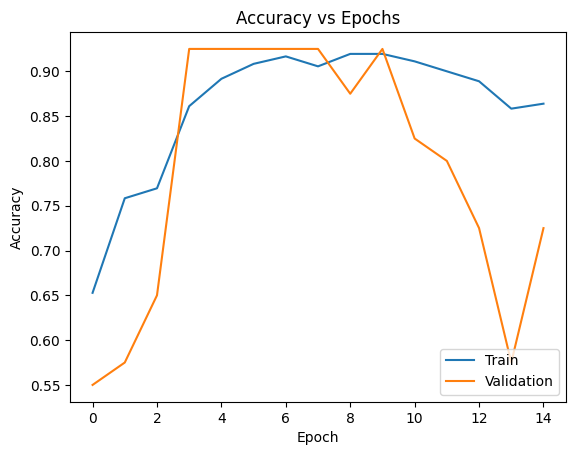

In [140]:
# Let's create our optimal model using the architecture we identified as the best before, utilizing Bayesian search.
# This new model is called model_5_2

model_5_2 = Sequential()
model_5_2.add(Dense(66, activation='tanh', input_shape=(7,), kernel_initializer=GlorotUniform()))
model_5_2.add(Dense(50, activation='tanh'))
model_5_2.add(Dense(1, activation='sigmoid'))
model_5_2.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.02708189655654633), metrics=['accuracy'])
start_time = time.time()
history_5_2 = model_5_2.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=200,
                    verbose=2,
                    callbacks=[early_stopping])
end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the model_5_2: {training_time:.2f} seconds")
print ('======================================================================================================================')
plt.plot(history_5_2.history['accuracy'])
plt.plot(history_5_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7078 - loss: 0.5213 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Results for model_5_2 TEST
              precision    recall  f1-score   support

           0       0.73      0.97      0.84        73
           1       0.33      0.04      0.07        27

    accuracy                           0.72       100
   macro avg       0.53      0.50      0.45       100
weighted avg       0.62      0.72      0.63       100



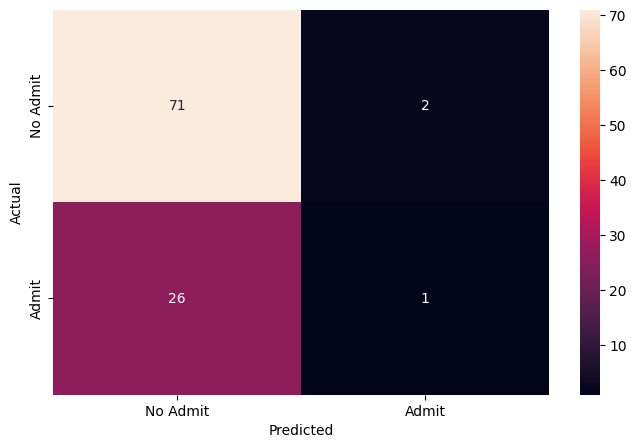

In [141]:
# Let's see now the predictions for y_test and construct the corresponding Confussion Matrix and the Classification Report.
model_5_2.evaluate(X_test_normalized, y_test, verbose = 1)
model_5_2_test_pred = np.round(model_5_2.predict(X_test_normalized))
print('======================================================================================================================')
print('Results for model_5_2 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_5_2_test_pred))
cm = confusion_matrix(y_test,model_5_2_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Using this optimal architecture (and all previous optimizations), we achieved an accuracy above 90%, 95% recall, and 92% F1-score. Training stopped around epoch 30, and the entire process took approximately 5 seconds.

### **6. Batch normalization and Drop-out.**

In [142]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 - 3s - 212ms/step - accuracy: 0.5222 - loss: 0.7601 - val_accuracy: 0.5250 - val_loss: 0.6646
Epoch 2/200
12/12 - 0s - 15ms/step - accuracy: 0.7222 - loss: 0.5338 - val_accuracy: 0.5250 - val_loss: 0.6536
Epoch 3/200
12/12 - 0s - 21ms/step - accuracy: 0.7889 - loss: 0.4458 - val_accuracy: 0.5500 - val_loss: 0.6275
Epoch 4/200
12/12 - 0s - 12ms/step - accuracy: 0.8222 - loss: 0.3963 - val_accuracy: 0.6750 - val_loss: 0.5902
Epoch 5/200
12/12 - 0s - 13ms/step - accuracy: 0.8444 - loss: 0.3614 - val_accuracy: 0.8500 - val_loss: 0.5545
Epoch 6/200
12/12 - 0s - 24ms/step - accuracy: 0.8556 - loss: 0.3350 - val_accuracy: 0.9250 - val_loss: 0.5280
Epoch 7/200
12/12 - 0s - 10ms/step - accuracy: 0.8583 - loss: 0.3139 - val_accuracy: 0.9250 - val_loss: 0.5120
Epoch 8/200
12/12 - 0s - 7ms/step - accuracy: 0.8778 - loss: 0.2961 - val_accuracy: 0.8750 - val_loss: 0.5040
Epoch 9/200
12/12 - 0s - 8ms/step - accuracy: 0.8861 - loss: 0.2808 - val_accuracy: 0.7250 - val_loss: 0.5019
Epoch 10/200
1

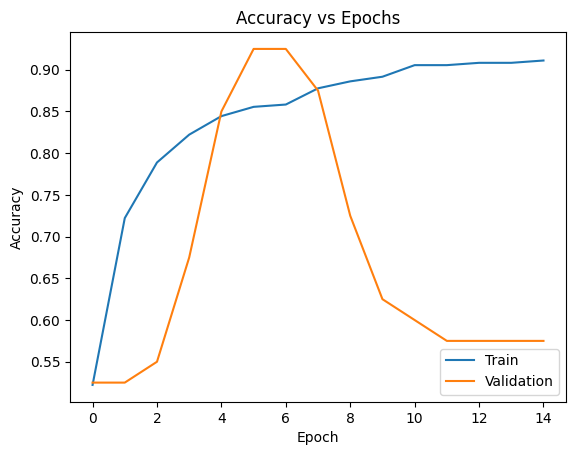

In [143]:
#Let's implement Batch Normalization on the best model (model_5)
model_6_1 = Sequential()
model_6_1.add(Dense(16, activation='tanh', input_shape=(7,), kernel_initializer=GlorotUniform()))
model_6_1.add(Dense(32, activation='tanh'))
model_6_1.add(BatchNormalization())
model_6_1.add(Dense(1, activation='sigmoid'))
model_6_1.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
start_time = time.time()
history_6_1 = model_6_1.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=200,
                    verbose=2,
                    callbacks=[early_stopping])
end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the model_6_1 (applying Batch normalization) : {training_time:.2f} seconds")
print ('======================================================================================================================')
plt.plot(history_6_1.history['accuracy'])
plt.plot(history_6_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3475 - loss: 0.7299 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Results for model_6_1 TEST
              precision    recall  f1-score   support

           0       1.00      0.10      0.17        73
           1       0.29      1.00      0.45        27

    accuracy                           0.34       100
   macro avg       0.65      0.55      0.31       100
weighted avg       0.81      0.34      0.25       100



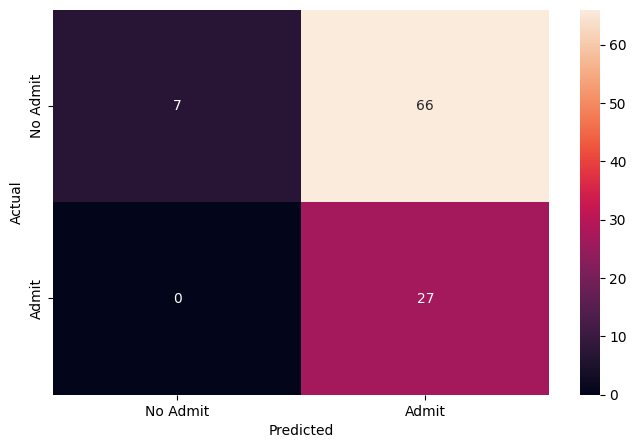

In [144]:
# Let's see now the predictions for y_test and construct the corresponding Confussion Matrix and the Classification Report.
model_6_1.evaluate(X_test_normalized, y_test, verbose = 1)
model_6_1_test_pred = np.round(model_6_1.predict(X_test_normalized))
print('======================================================================================================================')
print('Results for model_6_1 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_6_1_test_pred))
cm = confusion_matrix(y_test, model_6_1_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

It seems that batch normalization has affected the model's efficiency. A combination of previous optimization strategies (such as weight initialization and early stopping) may not yield effective results when applying batch normalization.

Let's try now Drop-out.

In [145]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Resetting the backend. This is necessary for cleaning memory for temporal variables
from tensorflow.keras import backend
backend.clear_session()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
12/12 - 2s - 169ms/step - accuracy: 0.3500 - loss: 0.7878 - val_accuracy: 0.5500 - val_loss: 0.6996
Epoch 2/200
12/12 - 0s - 8ms/step - accuracy: 0.6611 - loss: 0.6560 - val_accuracy: 0.5750 - val_loss: 0.7244
Epoch 3/200
12/12 - 0s - 12ms/step - accuracy: 0.7278 - loss: 0.6221 - val_accuracy: 0.5750 - val_loss: 0.7523
Epoch 4/200
12/12 - 0s - 6ms/step - accuracy: 0.7250 - loss: 0.6243 - val_accuracy: 0.5750 - val_loss: 0.7493
Epoch 5/200
12/12 - 0s - 6ms/step - accuracy: 0.7250 - loss: 0.5992 - val_accuracy: 0.5750 - val_loss: 0.7308
Epoch 6/200
12/12 - 0s - 7ms/step - accuracy: 0.7250 - loss: 0.5878 - val_accuracy: 0.5750 - val_loss: 0.7107
Epoch 7/200
12/12 - 0s - 12ms/step - accuracy: 0.7167 - loss: 0.5860 - val_accuracy: 0.5750 - val_loss: 0.6948
Epoch 8/200
12/12 - 0s - 11ms/step - accuracy: 0.7083 - loss: 0.5583 - val_accuracy: 0.5750 - val_loss: 0.6837
Epoch 9/200
12/12 - 0s - 11ms/step - accuracy: 0.7222 - loss: 0.5498 - val_accuracy: 0.5750 - val_loss: 0.6769
Epoc

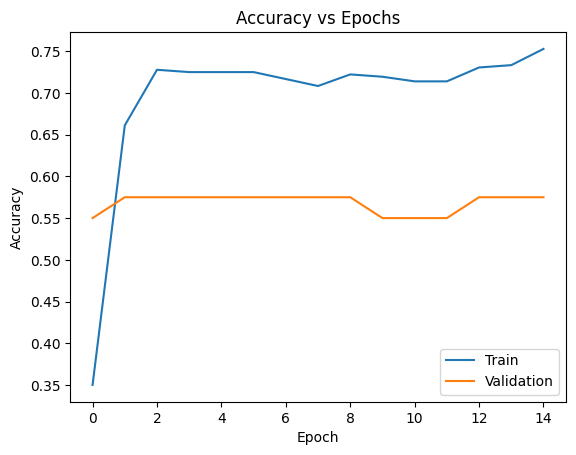

In [146]:
#Let's implement Drop Out on the best model (model_5) creating a new one: model_6_2
model_6_2 = Sequential()
model_6_2.add(Dense(16, activation='tanh', input_shape=(7,), kernel_initializer=GlorotUniform()))
model_6_2.add(Dense(32, activation='tanh'))
model_6_2.add(Dropout(0.2))                                                     # Here, we are inactivating the 20% of neurons for the second hidden layer
model_6_2.add(Dense(1, activation='sigmoid'))
model_6_2.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
start_time = time.time()
history_6_2 = model_6_2.fit(X_train_normalized,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=200,
                    verbose=2,
                    callbacks=[early_stopping])
end_time = time.time()
training_time = end_time - start_time
print ('======================================================================================================================')
print(f"Time taken to train the model_6_2 (applying Drop Out) : {training_time:.2f} seconds")
print ('======================================================================================================================')
plt.plot(history_6_2.history['accuracy'])
plt.plot(history_6_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5982 - loss: 0.6876 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Results for model_6_2 TEST
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        73
           1       0.39      0.81      0.53        27

    accuracy                           0.61       100
   macro avg       0.64      0.67      0.60       100
weighted avg       0.75      0.61      0.63       100



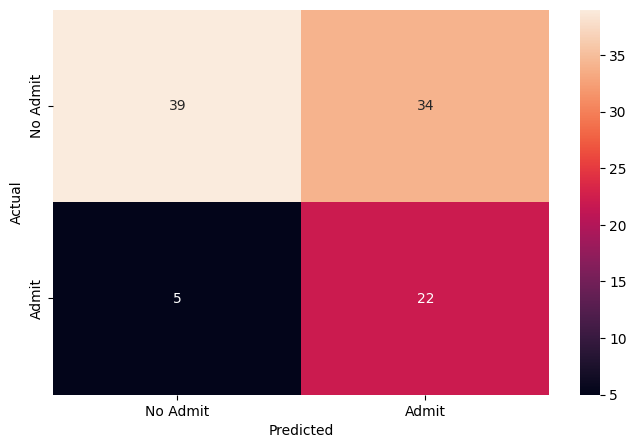

In [147]:
# Let's see now the predictions for y_test and construct the corresponding Confussion Matrix and the Classification Report.
model_6_2.evaluate(X_test_normalized, y_test, verbose = 1)
model_6_2_test_pred = np.round(model_6_2.predict(X_test_normalized))
print('======================================================================================================================')
print('Results for model_6_2 TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_6_2_test_pred))
cm = confusion_matrix(y_test, model_6_2_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['No Admit', 'Admit'], yticklabels=['No Admit', 'Admit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The effect of dropout is commonly more effective than batch normalization. As expected, previous optimization efforts may affect the efficacy of dropout on model performance. Therefore, the previous efforts were more powerful than the regularization strategies deployed (Batch Normalization and Dropout).

## **END OF THE NOTEBOOK**